# Text Analysis Operations using NLTK

In [34]:
import nltk
nltk.download('punkt')
import pandas as pd

[nltk_data] Downloading package punkt to /home/amine/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## I - Tokenization

In [4]:
from nltk.tokenize import sent_tokenize
text="""Hello Mr. Smith, how are you doing today? The weather is great, and city is awesome.
The sky is pinkish-blue. You shouldn't eat cardboard"""
tokenized_text=sent_tokenize(text)
print(tokenized_text)

['Hello Mr. Smith, how are you doing today?', 'The weather is great, and city is awesome.', 'The sky is pinkish-blue.', "You shouldn't eat cardboard"]


## II- Word tokenization

In [5]:
from nltk.tokenize import word_tokenize
tokenized_word=word_tokenize(text)
print(tokenized_word)

['Hello', 'Mr.', 'Smith', ',', 'how', 'are', 'you', 'doing', 'today', '?', 'The', 'weather', 'is', 'great', ',', 'and', 'city', 'is', 'awesome', '.', 'The', 'sky', 'is', 'pinkish-blue', '.', 'You', 'should', "n't", 'eat', 'cardboard']


## III - Frequency Distribution

In [6]:
from nltk.probability import FreqDist
fdist = FreqDist(tokenized_word)
print(fdist)

<FreqDist with 25 samples and 30 outcomes>


In [7]:
fdist.most_common(2)

[('is', 3), (',', 2)]

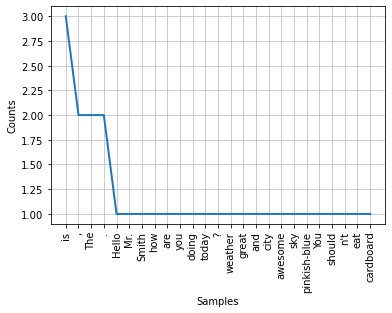

In [9]:
import matplotlib.pyplot as plt
fdist.plot(30,cumulative=False)
plt.show()

## IV - Stopwords and Removing Stopwords

In [11]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words=set(stopwords.words("english"))
print(stop_words)

[nltk_data] Downloading package stopwords to /home/amine/nltk_data...


{'an', 'their', 'these', 'before', 'other', 'no', "wasn't", 're', 'your', 'yourselves', 'just', 't', 'having', 'again', 'nor', "shouldn't", 'those', 'but', 'll', 'me', 'o', 'now', 'himself', 'more', 'they', 'themselves', 'from', 'in', 'when', 'have', 'on', 'couldn', 'didn', 'herself', "don't", 'during', 'if', 'all', "doesn't", "hadn't", 'whom', "mustn't", "you'd", 'd', 'out', 'my', 'hasn', 'further', 'his', 'were', "it's", 'a', 'than', 'between', "should've", 'be', 'doing', 'this', "that'll", 'only', 'where', "aren't", 'hadn', 'why', 'her', 'for', 'so', 'haven', 'wouldn', 'off', 'then', 'shouldn', 'to', "you've", 'she', 'was', 'them', 'under', 'here', 'up', 'because', 'him', 'being', 'until', 'he', 'once', "hasn't", 'shan', 'myself', 'it', 'is', 'are', 'its', 'while', 'both', 'same', 'below', 'over', 'down', 'we', 'mightn', 'mustn', 'our', 'above', 'as', "shan't", 'theirs', 'the', 'few', "you'll", 'does', 'ma', 'needn', 'what', 'don', 'or', 'at', 'too', 'ain', 'not', 'some', 'which', '

[nltk_data]   Unzipping corpora/stopwords.zip.


In [20]:
tokenized_text[0]

'Hello Mr. Smith, how are you doing today?'

In [23]:
filtered_sent=[]
tokenized_word=word_tokenize(tokenized_text[0])
for w in tokenized_word:
    if w not in stop_words:
        filtered_sent.append(w)
print("Tokenized Sentence:",tokenized_text[0])
print("Filterd Sentence:",filtered_sent)

Tokenized Sentence: Hello Mr. Smith, how are you doing today?
Filterd Sentence: ['Hello', 'Mr.', 'Smith', ',', 'today', '?']


## V - Lexicon Normalization

### V - 1. Stemming

In [24]:
# Stemming
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize

ps = PorterStemmer()

stemmed_words=[]
for w in filtered_sent:
    stemmed_words.append(ps.stem(w))

print("Filtered Sentence:",filtered_sent)
print("Stemmed Sentence:",stemmed_words)

Filtered Sentence: ['Hello', 'Mr.', 'Smith', ',', 'today', '?']
Stemmed Sentence: ['hello', 'mr.', 'smith', ',', 'today', '?']


### V - 2. Lemmatization

In [26]:
#Lexicon Normalization
#performing stemming and Lemmatization
nltk.download('wordnet')
from nltk.stem.wordnet import WordNetLemmatizer
lem = WordNetLemmatizer()

from nltk.stem.porter import PorterStemmer
stem = PorterStemmer()

word = "flying"
print("Lemmatized Word:",lem.lemmatize(word,"v"))
print("Stemmed Word:",stem.stem(word))

[nltk_data] Downloading package wordnet to /home/amine/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


Lemmatized Word: fly
Stemmed Word: fli


## VI - POS Tagging

In [28]:
sent = "Albert Einstein was born in Ulm, Germany in 1879."
tokens=nltk.word_tokenize(sent)
print(tokens)

['Albert', 'Einstein', 'was', 'born', 'in', 'Ulm', ',', 'Germany', 'in', '1879', '.']


In [30]:
nltk.download('averaged_perceptron_tagger')
nltk.pos_tag(tokens)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/amine/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


[('Albert', 'NNP'),
 ('Einstein', 'NNP'),
 ('was', 'VBD'),
 ('born', 'VBN'),
 ('in', 'IN'),
 ('Ulm', 'NNP'),
 (',', ','),
 ('Germany', 'NNP'),
 ('in', 'IN'),
 ('1879', 'CD'),
 ('.', '.')]

# Sentiment Analysis

### Text Classification

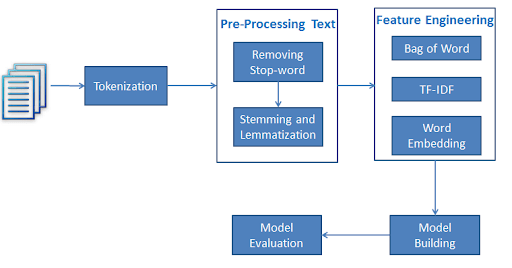

In [33]:
from IPython import display
display.Image("/home/amine/Desktop/NLP ML based approach.png")

# Performing Sentiment Analysis using Text Classification

In [44]:
data=pd.read_csv('/home/amine/Desktop/Untitled Folder/sentiment-analysis-on-movie-reviews/train.tsv', sep='\t')
data

,PhraseId,SentenceId,Phrase,Sentiment
0,1,1,A series of escapades demonstrating the adage ...,1
1,2,1,A series of escapades demonstrating the adage ...,2
2,3,1,A series,2
3,4,1,A,2
4,5,1,series,2
...,...,...,...,...
156055,156056,8544,Hearst 's,2
156056,156057,8544,forced avuncular chortles,1
156057,156058,8544,avuncular chortles,3
156058,156059,8544,avuncular,2


In [45]:
# Get more info about columns data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156060 entries, 0 to 156059
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   PhraseId    156060 non-null  int64 
 1   SentenceId  156060 non-null  int64 
 2   Phrase      156060 non-null  object
 3   Sentiment   156060 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 4.8+ MB


In [46]:
# Get the count number of each sentiment used in the dataset
data.Sentiment.value_counts()

2    79582
3    32927
1    27273
4     9206
0     7072
Name: Sentiment, dtype: int64

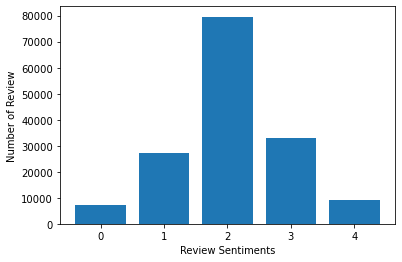

In [47]:
# Ploting the count number for each sentiment
Sentiment_count=data.groupby('Sentiment').count()
plt.bar(Sentiment_count.index.values, Sentiment_count['Phrase'])
plt.xlabel('Review Sentiments')
plt.ylabel('Number of Review')
plt.show()

## Feature Generation using Bag of Words

In [49]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
#tokenizer to remove unwanted elements from out data like symbols and numbers
token = RegexpTokenizer(r'[a-zA-Z0-9]+')
cv = CountVectorizer(lowercase=True,stop_words='english',ngram_range = (1,1),tokenizer = token.tokenize)
text_counts= cv.fit_transform(data['Phrase'])

## Split train and test set

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(text_counts, data['Sentiment'], test_size=0.3, random_state=1)

## Model Building and Evaluation

In [52]:
from sklearn.naive_bayes import MultinomialNB
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Generation Using Multinomial Naive Bayes
clf = MultinomialNB().fit(X_train, y_train)
predicted= clf.predict(X_test)
print("MultinomialNB Accuracy:",metrics.accuracy_score(y_test, predicted))

MultinomialNB Accuracy: 0.6049169122986885


## Feature Generation using TF-IDF

In [53]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf=TfidfVectorizer()
text_tf= tf.fit_transform(data['Phrase'])

### Split train and test set (TF-IDF)

In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(text_tf, data['Sentiment'], test_size=0.3, random_state=123)

### Model Building and Evaluation (TF-IDF)


In [55]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
# Model Generation Using Multinomial Naive Bayes
clf = MultinomialNB().fit(X_train, y_train)
predicted= clf.predict(X_test)
print("MultinomialNB Accuracy:",metrics.accuracy_score(y_test, predicted))

MultinomialNB Accuracy: 0.5865265496176684
